In [97]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "log_evaluations.xlsx"  # Replace with your actual file path
df = pd.read_excel("log_evaluations.xlsx")

In [98]:
df.head(5)
# filter models with les than 100 "Number of Samples"
df = df[df["Number of Samples"] > 100]

In [99]:
# sort the data by model name
df = df.sort_values(by='Model')

In [100]:
# Function to insert line breaks in model names and make all letters lowercase
def process_model_names(text, max_length=20):
    text = text.lower()
    return '\n'.join([text[i:i+max_length] for i in range(0, len(text), max_length)])

# Apply the transformations to the 'Model' column
df['Model'] = df['Model'].apply(process_model_names)

# Sort the DataFrame by the modified 'Model' column
df = df.sort_values(by='Model')

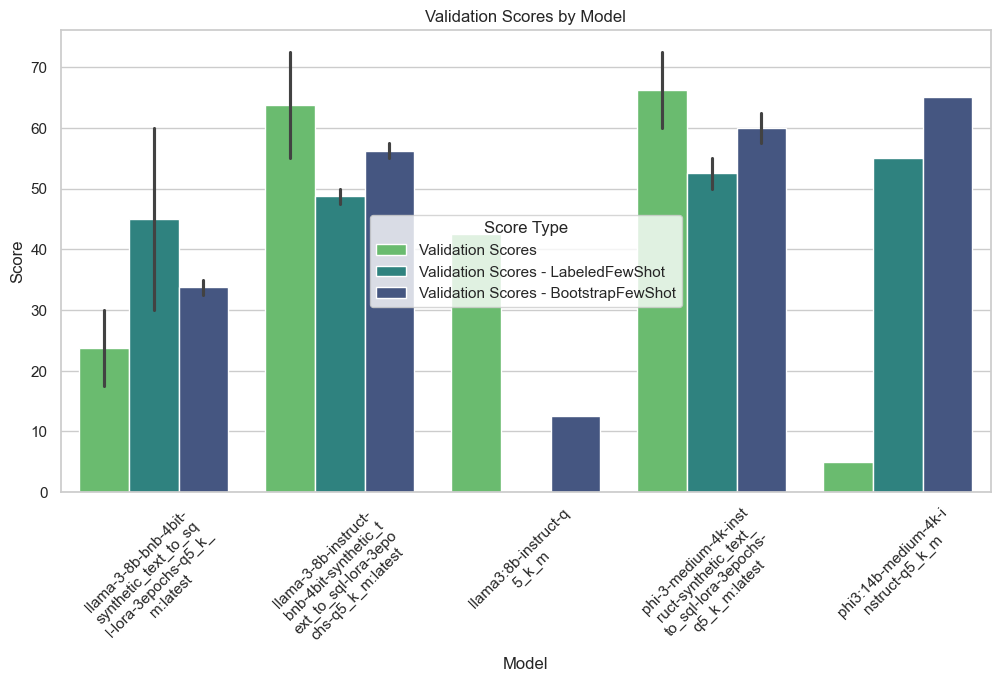

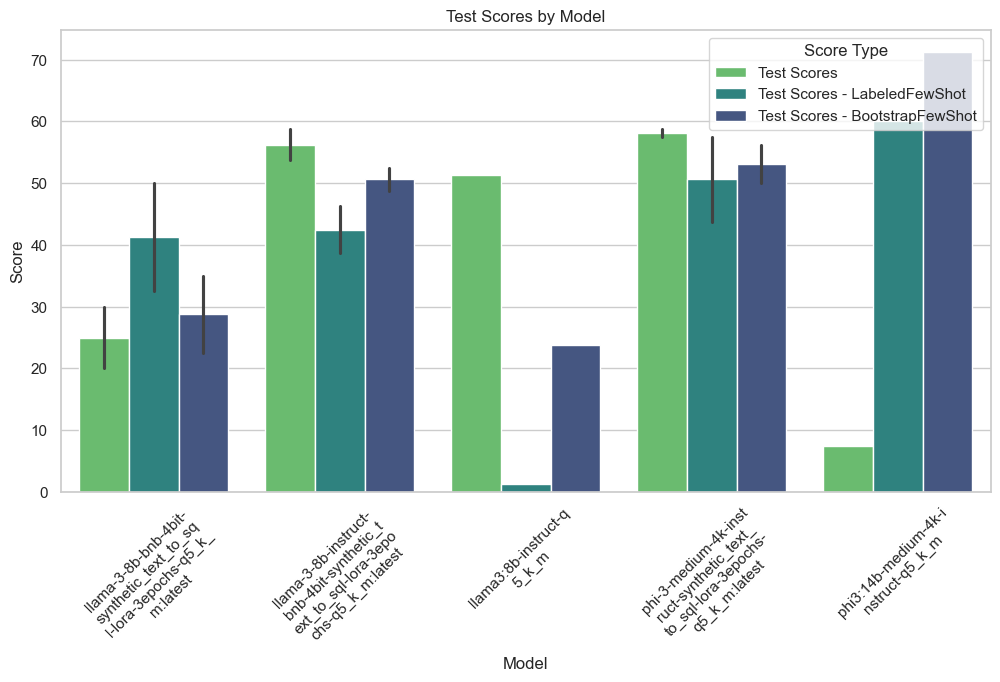

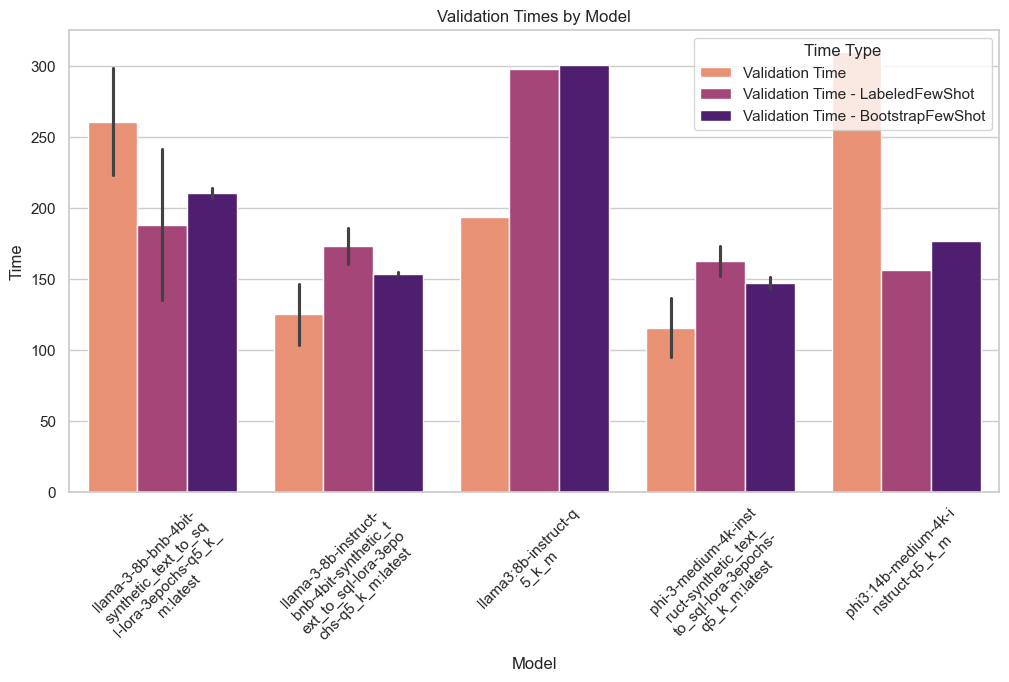

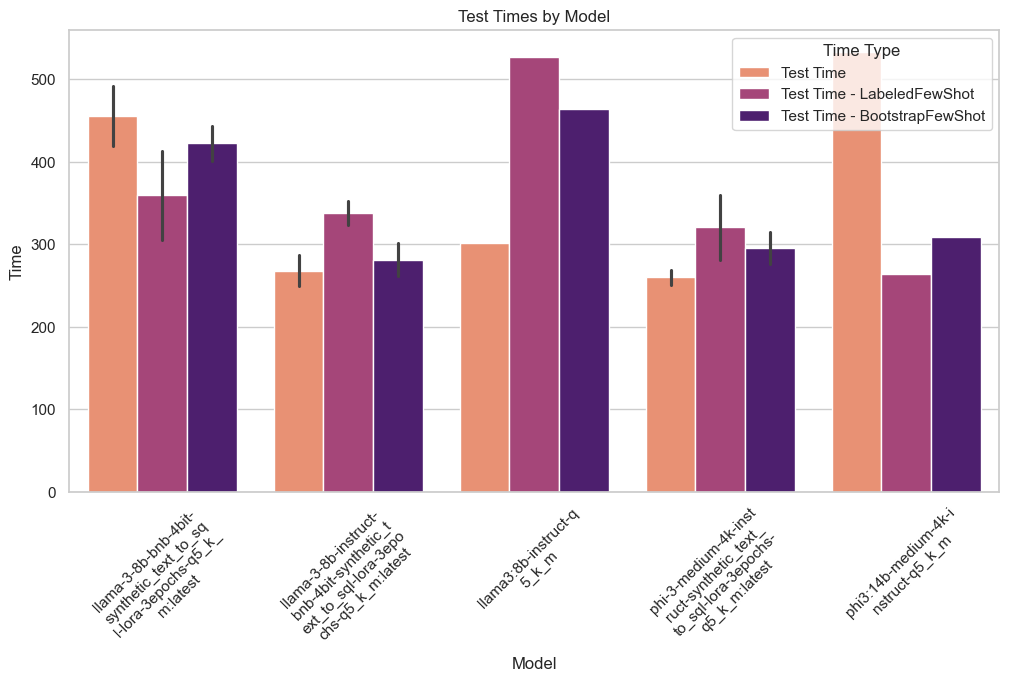

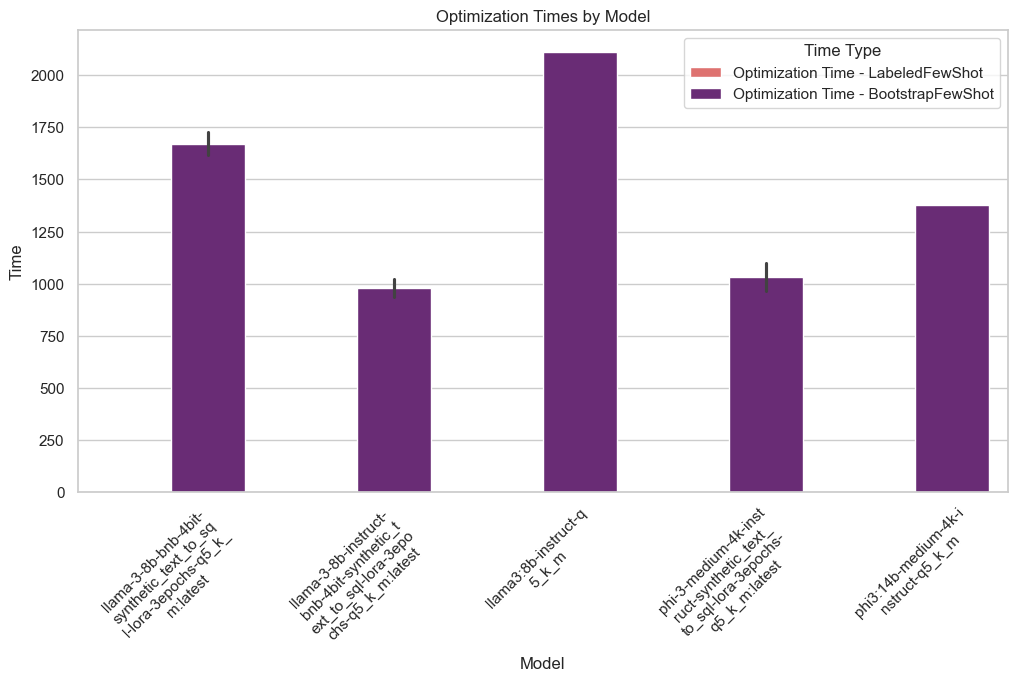

In [101]:
# Set seaborn style for the plots
sns.set(style='whitegrid')

# Function to create grouped bar plot for scores
def plot_grouped_scores(df, score_columns, title):
    melted_df = df.melt(id_vars=['Model'], value_vars=score_columns, var_name='Score Type', value_name='Score')
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Score', hue='Score Type', data=melted_df, palette='viridis_r')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Function to create grouped bar plot for times
def plot_grouped_times(df, time_columns, title):
    melted_df = df.melt(id_vars=['Model'], value_vars=time_columns, var_name='Time Type', value_name='Time')
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Time', hue='Time Type', data=melted_df, palette='magma_r')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()


# # Plot grouped validation and test scores
# plot_grouped_scores(df, ['Validation Scores', 'Test Scores'], 'Validation and Test Scores by Model')

# Plot grouped labeled few-shot validation scores
plot_grouped_scores(df, ['Validation Scores', 'Validation Scores - LabeledFewShot', 'Validation Scores - BootstrapFewShot'], 'Validation Scores by Model')

# Plot grouped labeled bootstrap few-shot validation scores
plot_grouped_scores(df, ['Test Scores', 'Test Scores - LabeledFewShot', 'Test Scores - BootstrapFewShot'], 'Test Scores by Model')

# Plot grouped validation times
plot_grouped_times(df, ['Validation Time', 'Validation Time - LabeledFewShot', 'Validation Time - BootstrapFewShot'], 'Validation Times by Model')

# Plot grouped test times
plot_grouped_times(df, ['Test Time', 'Test Time - LabeledFewShot', 'Test Time - BootstrapFewShot'], 'Test Times by Model')


# Plot grouped optimization times
plot_grouped_times(df, ['Optimization Time - LabeledFewShot', 'Optimization Time - BootstrapFewShot'], 'Optimization Times by Model')

C:\Users\Felix\AppData\Local\Temp\ipykernel_2368\3685858586.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Number of Samples', data=df, palette='coolwarm')


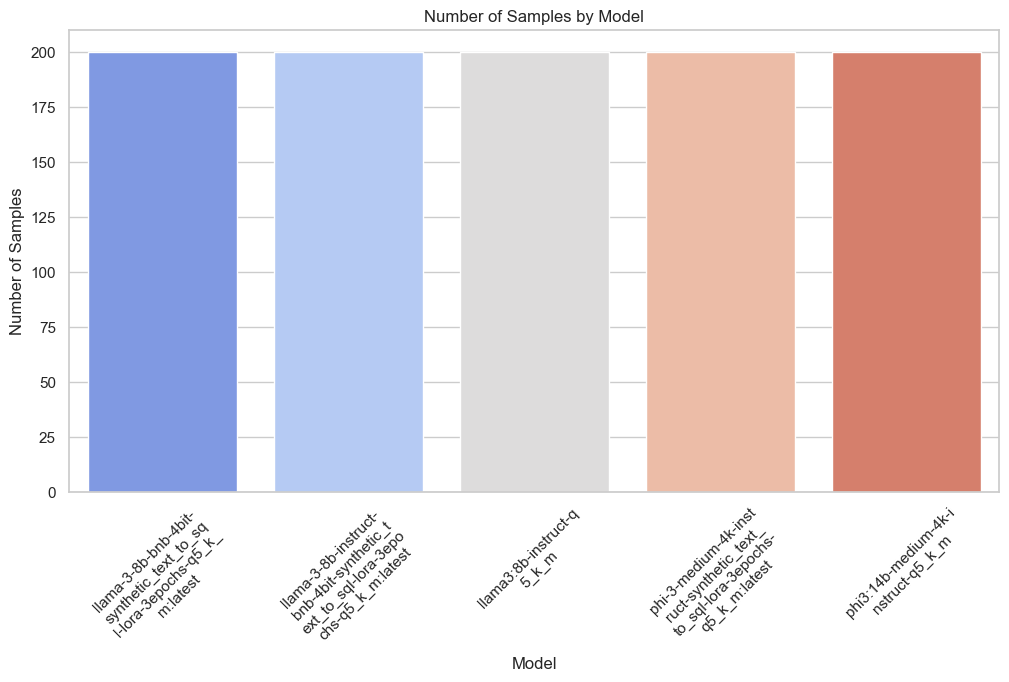

C:\Users\Felix\AppData\Local\Temp\ipykernel_2368\3685858586.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Random Seed', data=df, palette='tab10')


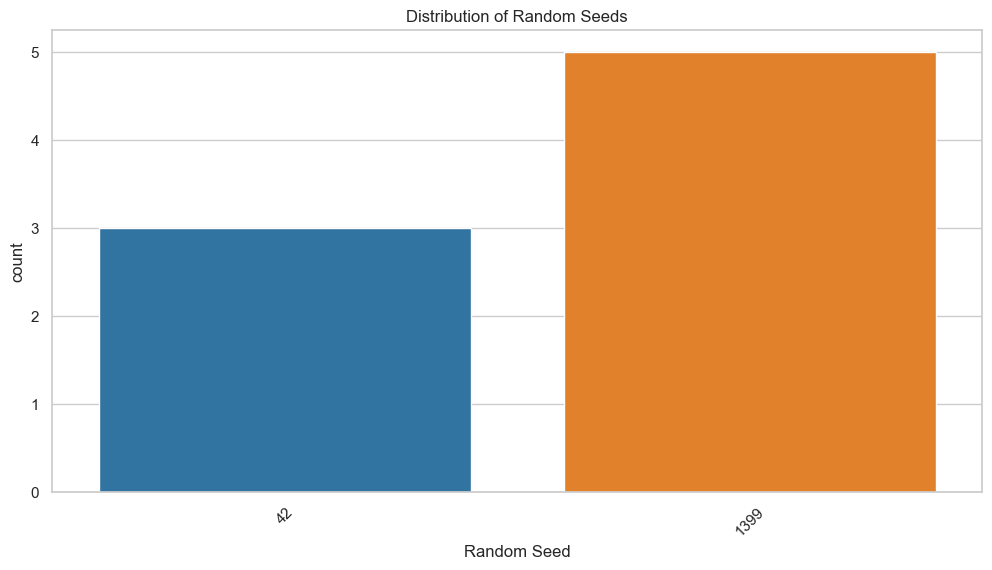

C:\Users\Felix\AppData\Local\Temp\ipykernel_2368\3685858586.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Number of candidate programs - LabeledFewShot', data=df, palette='spring', label='LabeledFewShot')
C:\Users\Felix\AppData\Local\Temp\ipykernel_2368\3685858586.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Number of candidate programs - BootstrapFewShot', data=df, palette='summer', label='BootstrapFewShot')


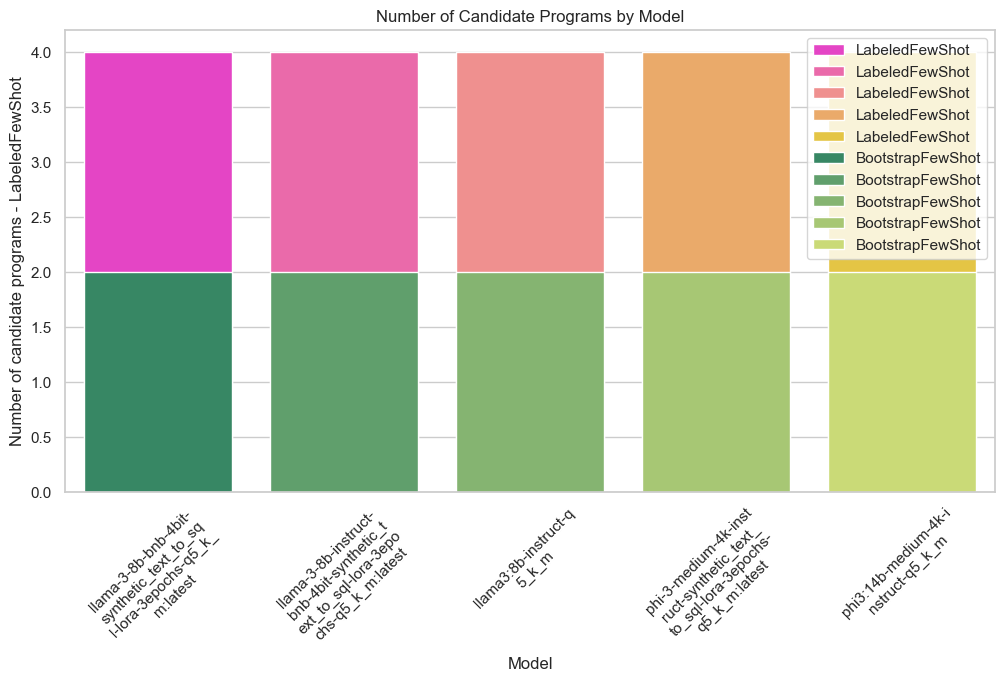

In [102]:
# Additional functions for further analysis

# Function to plot number of samples by model
def plot_samples(df):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Number of Samples', data=df, palette='coolwarm')
    plt.title('Number of Samples by Model')
    plt.xticks(rotation=45)
    plt.show()

# Function to plot random seed distribution
def plot_random_seed(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Random Seed', data=df, palette='tab10')
    plt.title('Distribution of Random Seeds')
    plt.xticks(rotation=45)
    plt.show()

# Plot number of samples and random seed distribution
plot_samples(df)
plot_random_seed(df)

# Function to plot comparison of candidate programs in FewShot methods
def plot_candidate_programs(df):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Number of candidate programs - LabeledFewShot', data=df, palette='spring', label='LabeledFewShot')
    sns.barplot(x='Model', y='Number of candidate programs - BootstrapFewShot', data=df, palette='summer', label='BootstrapFewShot')
    plt.title('Number of Candidate Programs by Model')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Plot candidate programs comparison
plot_candidate_programs(df)

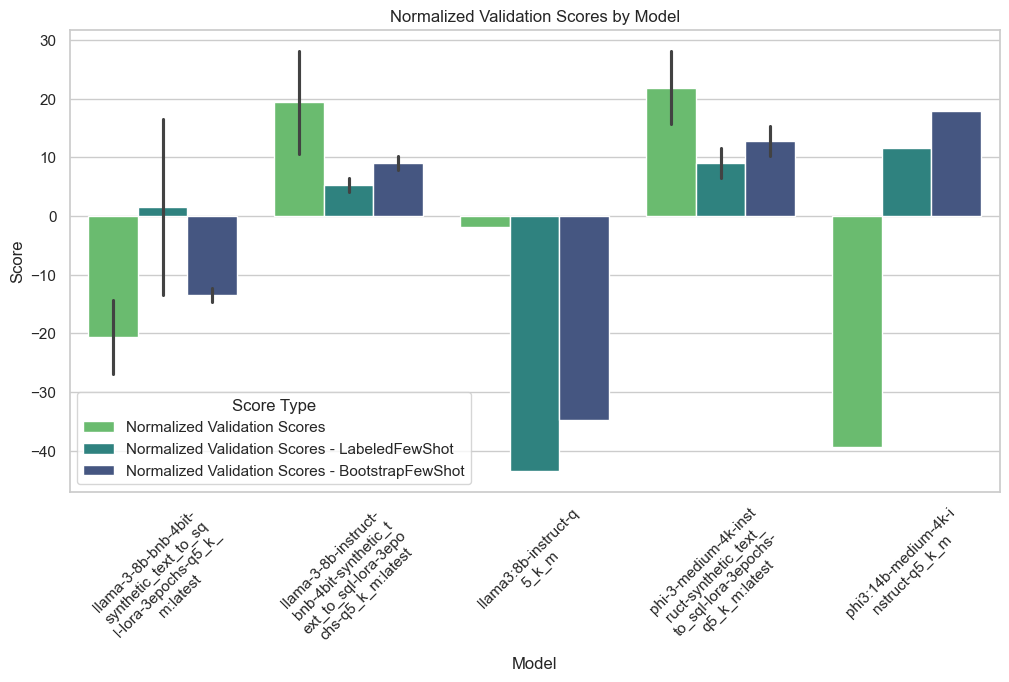

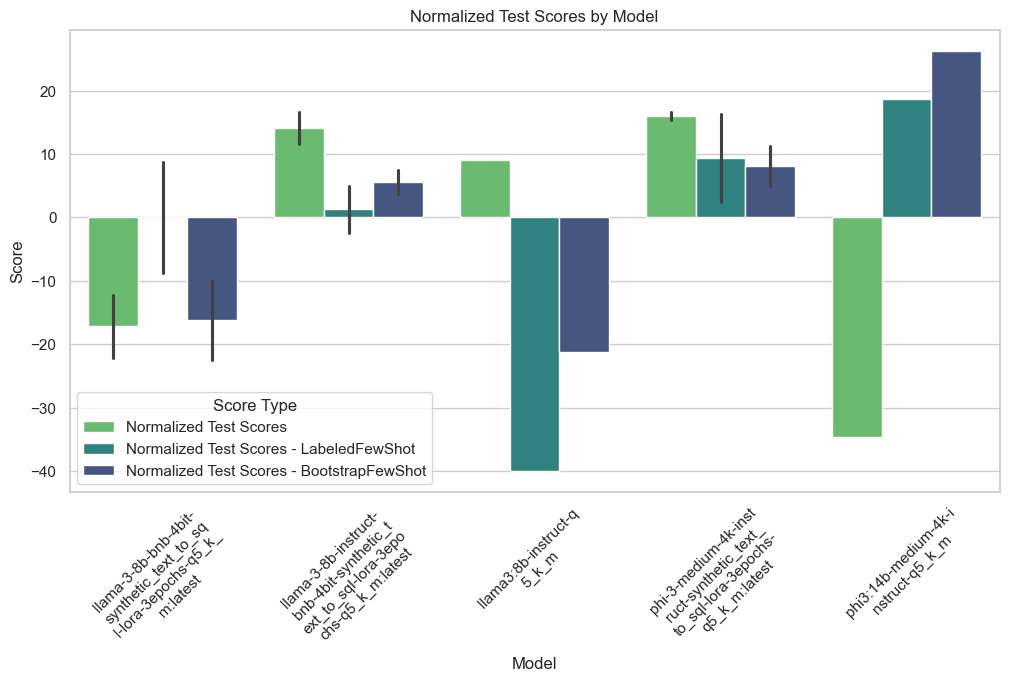

In [103]:
sns.set(style='whitegrid')

# Function to create grouped bar plot for scores
def plot_grouped_scores(df, score_columns, title):
    melted_df = df.melt(id_vars=['Model'], value_vars=score_columns, var_name='Score Type', value_name='Score')
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Score', hue='Score Type', data=melted_df, palette='viridis_r')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Function to create grouped bar plot for times
def plot_grouped_times(df, time_columns, title):
    melted_df = df.melt(id_vars=['Model'], value_vars=time_columns, var_name='Time Type', value_name='Time')
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Time', hue='Time Type', data=melted_df, palette='magma_r')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Calculate the mean performance for each score type
mean_validation_scores = df[['Validation Scores', 'Validation Scores - LabeledFewShot', 'Validation Scores - BootstrapFewShot']].mean(axis=0)
mean_test_scores = df[['Test Scores', 'Test Scores - LabeledFewShot', 'Test Scores - BootstrapFewShot']].mean(axis=0)

# Normalize the scores by subtracting the mean score
df['Normalized Validation Scores'] = df['Validation Scores'] - mean_validation_scores['Validation Scores']
df['Normalized Validation Scores - LabeledFewShot'] = df['Validation Scores - LabeledFewShot'] - mean_validation_scores['Validation Scores - LabeledFewShot']
df['Normalized Validation Scores - BootstrapFewShot'] = df['Validation Scores - BootstrapFewShot'] - mean_validation_scores['Validation Scores - BootstrapFewShot']

df['Normalized Test Scores'] = df['Test Scores'] - mean_test_scores['Test Scores']
df['Normalized Test Scores - LabeledFewShot'] = df['Test Scores - LabeledFewShot'] - mean_test_scores['Test Scores - LabeledFewShot']
df['Normalized Test Scores - BootstrapFewShot'] = df['Test Scores - BootstrapFewShot'] - mean_test_scores['Test Scores - BootstrapFewShot']

# Plot grouped normalized validation scores
plot_grouped_scores(df, ['Normalized Validation Scores', 'Normalized Validation Scores - LabeledFewShot', 'Normalized Validation Scores - BootstrapFewShot'], 'Normalized Validation Scores by Model')

# Plot grouped normalized test scores
plot_grouped_scores(df, ['Normalized Test Scores', 'Normalized Test Scores - LabeledFewShot', 'Normalized Test Scores - BootstrapFewShot'], 'Normalized Test Scores by Model')


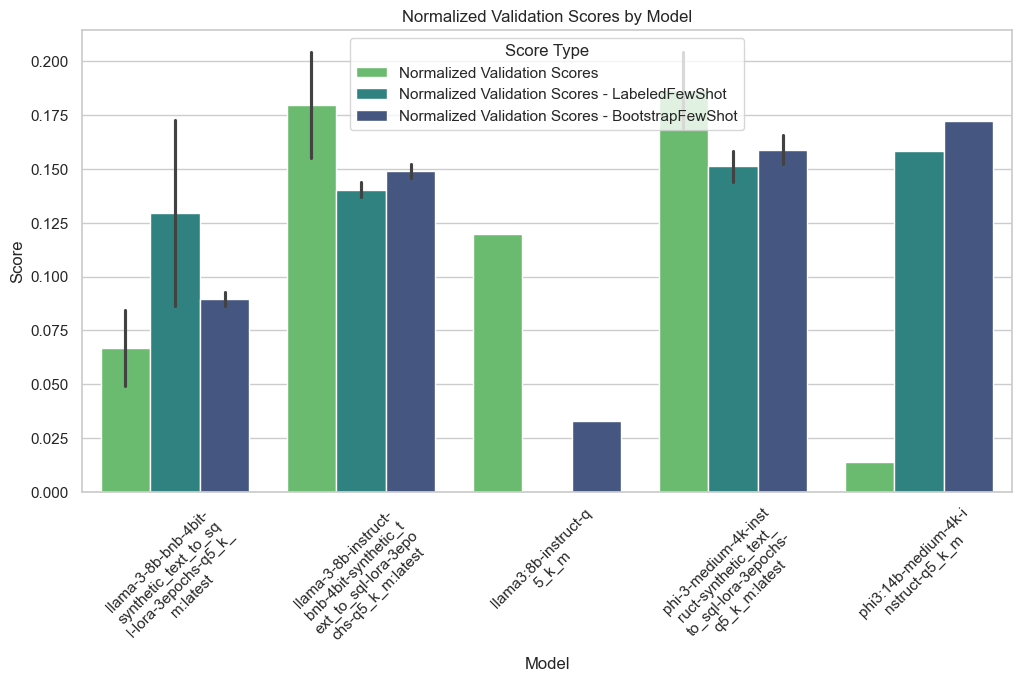

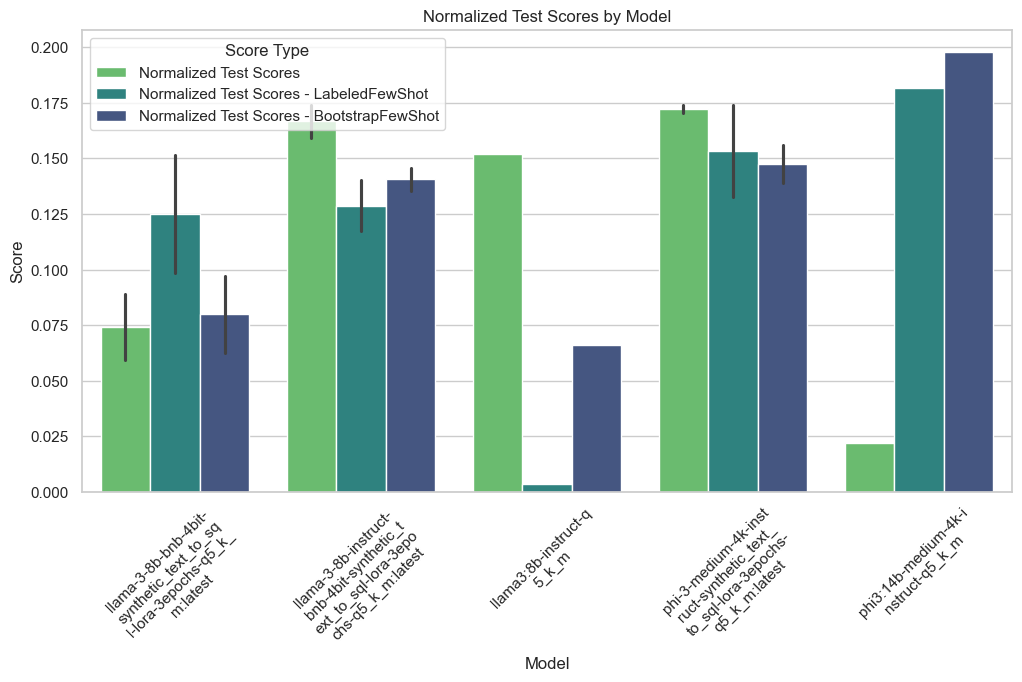

In [104]:
# Calculate the sum of each score type
sum_validation_scores = df[['Validation Scores', 'Validation Scores - LabeledFewShot', 'Validation Scores - BootstrapFewShot']].sum(axis=0)
sum_test_scores = df[['Test Scores', 'Test Scores - LabeledFewShot', 'Test Scores - BootstrapFewShot']].sum(axis=0)

# Normalize the scores by dividing by the sum
df['Normalized Validation Scores'] = df['Validation Scores'] / sum_validation_scores['Validation Scores']
df['Normalized Validation Scores - LabeledFewShot'] = df['Validation Scores - LabeledFewShot'] / sum_validation_scores['Validation Scores - LabeledFewShot']
df['Normalized Validation Scores - BootstrapFewShot'] = df['Validation Scores - BootstrapFewShot'] / sum_validation_scores['Validation Scores - BootstrapFewShot']

df['Normalized Test Scores'] = df['Test Scores'] / sum_test_scores['Test Scores']
df['Normalized Test Scores - LabeledFewShot'] = df['Test Scores - LabeledFewShot'] / sum_test_scores['Test Scores - LabeledFewShot']
df['Normalized Test Scores - BootstrapFewShot'] = df['Test Scores - BootstrapFewShot'] / sum_test_scores['Test Scores - BootstrapFewShot']

# Plot grouped normalized validation scores
plot_grouped_scores(df, ['Normalized Validation Scores', 'Normalized Validation Scores - LabeledFewShot', 'Normalized Validation Scores - BootstrapFewShot'], 'Normalized Validation Scores by Model')

# Plot grouped normalized test scores
plot_grouped_scores(df, ['Normalized Test Scores', 'Normalized Test Scores - LabeledFewShot', 'Normalized Test Scores - BootstrapFewShot'], 'Normalized Test Scores by Model')


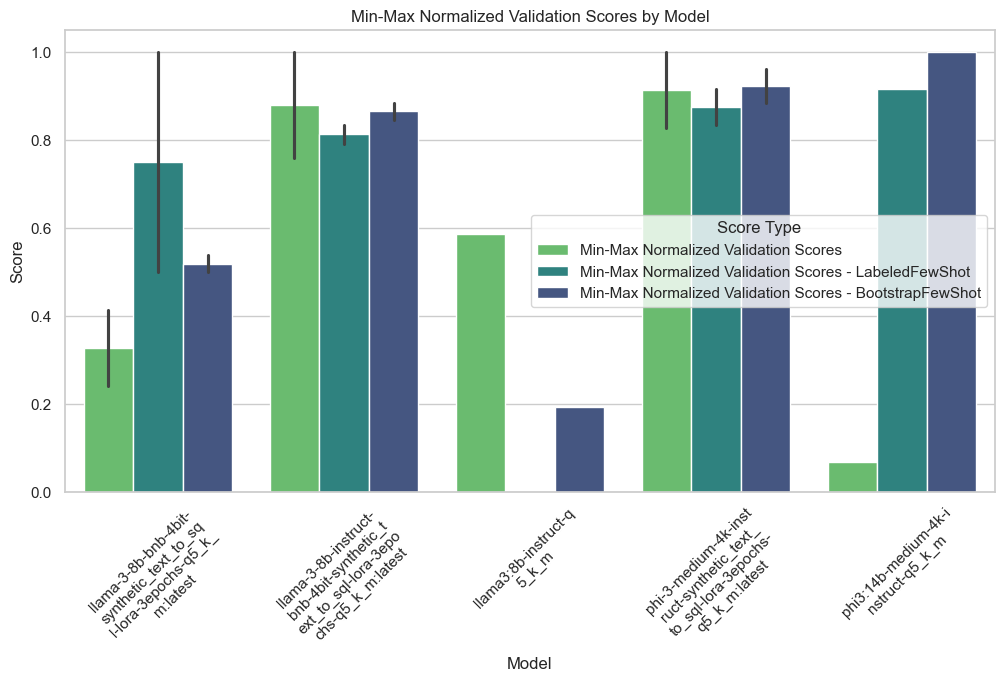

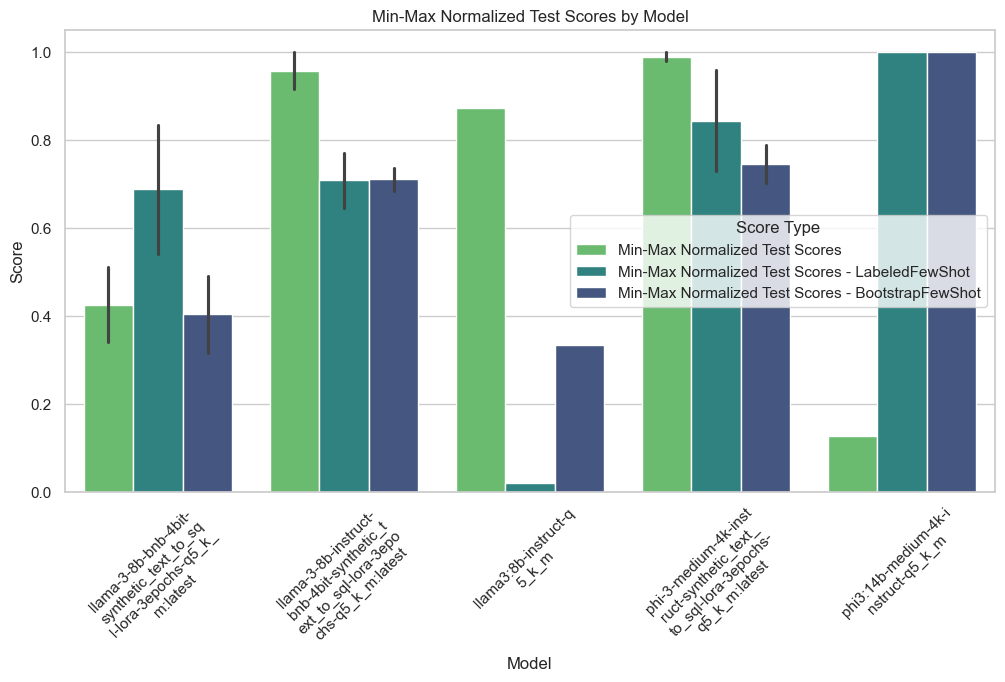

In [105]:
# Calculate the maximum value for each score type
max_validation_scores = df[['Validation Scores', 'Validation Scores - LabeledFewShot', 'Validation Scores - BootstrapFewShot']].max(axis=0)
max_test_scores = df[['Test Scores', 'Test Scores - LabeledFewShot', 'Test Scores - BootstrapFewShot']].max(axis=0)

# Normalize the scores by dividing by the maximum value
df['Min-Max Normalized Validation Scores'] = df['Validation Scores'] / max_validation_scores['Validation Scores']
df['Min-Max Normalized Validation Scores - LabeledFewShot'] = df['Validation Scores - LabeledFewShot'] / max_validation_scores['Validation Scores - LabeledFewShot']
df['Min-Max Normalized Validation Scores - BootstrapFewShot'] = df['Validation Scores - BootstrapFewShot'] / max_validation_scores['Validation Scores - BootstrapFewShot']

df['Min-Max Normalized Test Scores'] = df['Test Scores'] / max_test_scores['Test Scores']
df['Min-Max Normalized Test Scores - LabeledFewShot'] = df['Test Scores - LabeledFewShot'] / max_test_scores['Test Scores - LabeledFewShot']
df['Min-Max Normalized Test Scores - BootstrapFewShot'] = df['Test Scores - BootstrapFewShot'] / max_test_scores['Test Scores - BootstrapFewShot']

# Plot min-max normalized validation scores
plot_grouped_scores(df, ['Min-Max Normalized Validation Scores', 'Min-Max Normalized Validation Scores - LabeledFewShot', 'Min-Max Normalized Validation Scores - BootstrapFewShot'], 'Min-Max Normalized Validation Scores by Model')

# Plot min-max normalized test scores
plot_grouped_scores(df, ['Min-Max Normalized Test Scores', 'Min-Max Normalized Test Scores - LabeledFewShot', 'Min-Max Normalized Test Scores - BootstrapFewShot'], 'Min-Max Normalized Test Scores by Model')


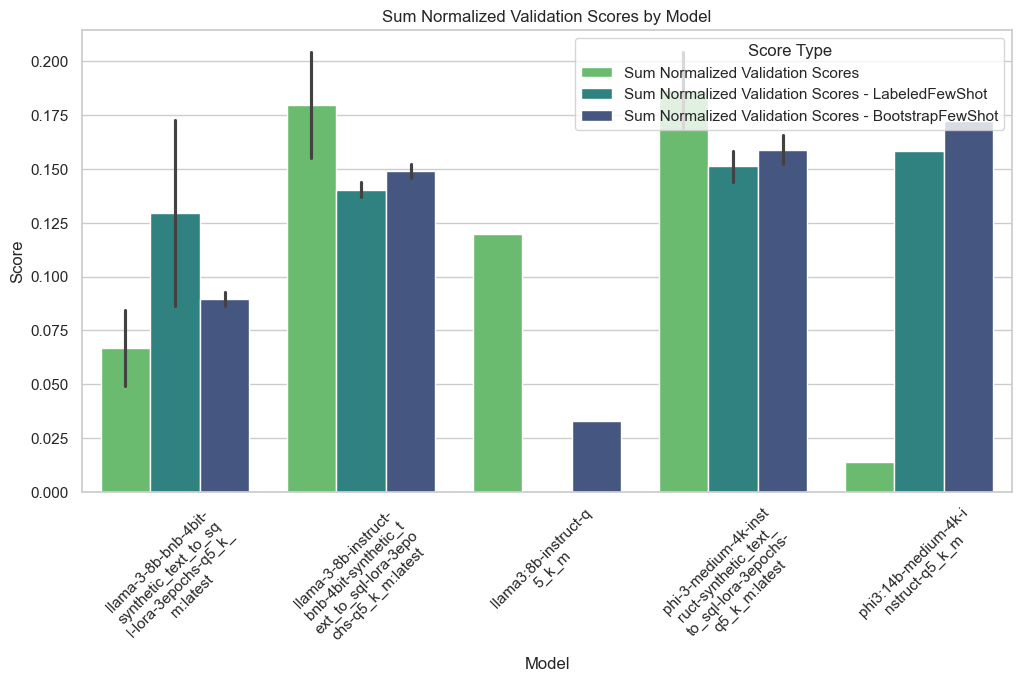

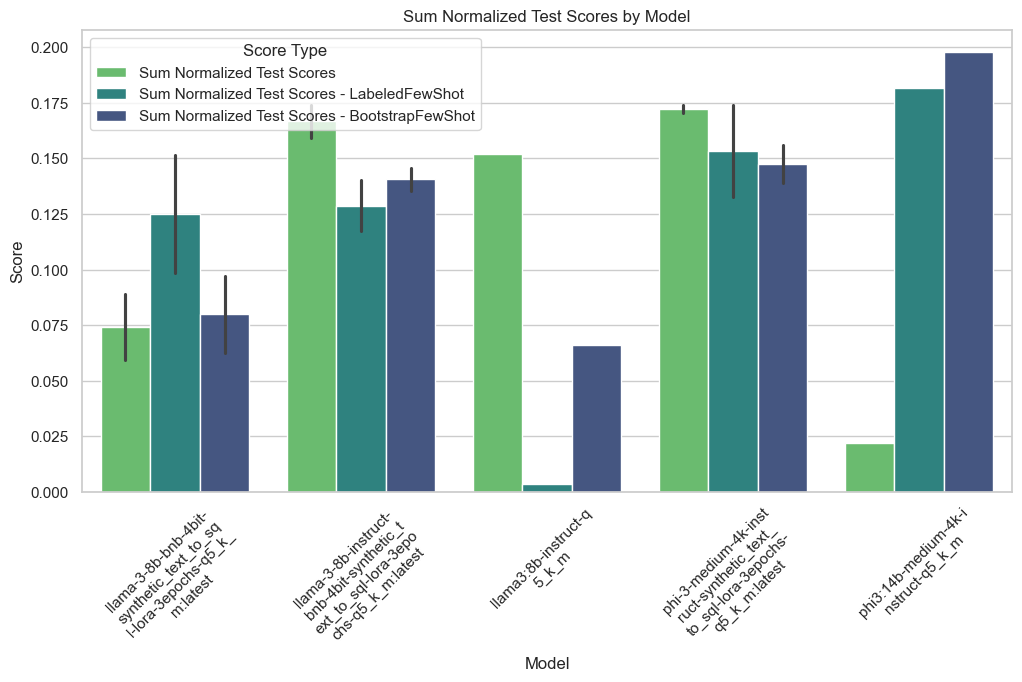

In [106]:
# Calculate the sum of each score type
sum_validation_scores = df[['Validation Scores', 'Validation Scores - LabeledFewShot', 'Validation Scores - BootstrapFewShot']].sum(axis=0)
sum_test_scores = df[['Test Scores', 'Test Scores - LabeledFewShot', 'Test Scores - BootstrapFewShot']].sum(axis=0)

# Normalize the scores by dividing by the sum
df['Sum Normalized Validation Scores'] = df['Validation Scores'] / sum_validation_scores['Validation Scores']
df['Sum Normalized Validation Scores - LabeledFewShot'] = df['Validation Scores - LabeledFewShot'] / sum_validation_scores['Validation Scores - LabeledFewShot']
df['Sum Normalized Validation Scores - BootstrapFewShot'] = df['Validation Scores - BootstrapFewShot'] / sum_validation_scores['Validation Scores - BootstrapFewShot']

df['Sum Normalized Test Scores'] = df['Test Scores'] / sum_test_scores['Test Scores']
df['Sum Normalized Test Scores - LabeledFewShot'] = df['Test Scores - LabeledFewShot'] / sum_test_scores['Test Scores - LabeledFewShot']
df['Sum Normalized Test Scores - BootstrapFewShot'] = df['Test Scores - BootstrapFewShot'] / sum_test_scores['Test Scores - BootstrapFewShot']

# Plot sum normalized validation scores
plot_grouped_scores(df, ['Sum Normalized Validation Scores', 'Sum Normalized Validation Scores - LabeledFewShot', 'Sum Normalized Validation Scores - BootstrapFewShot'], 'Sum Normalized Validation Scores by Model')

# Plot sum normalized test scores
plot_grouped_scores(df, ['Sum Normalized Test Scores', 'Sum Normalized Test Scores - LabeledFewShot', 'Sum Normalized Test Scores - BootstrapFewShot'], 'Sum Normalized Test Scores by Model')


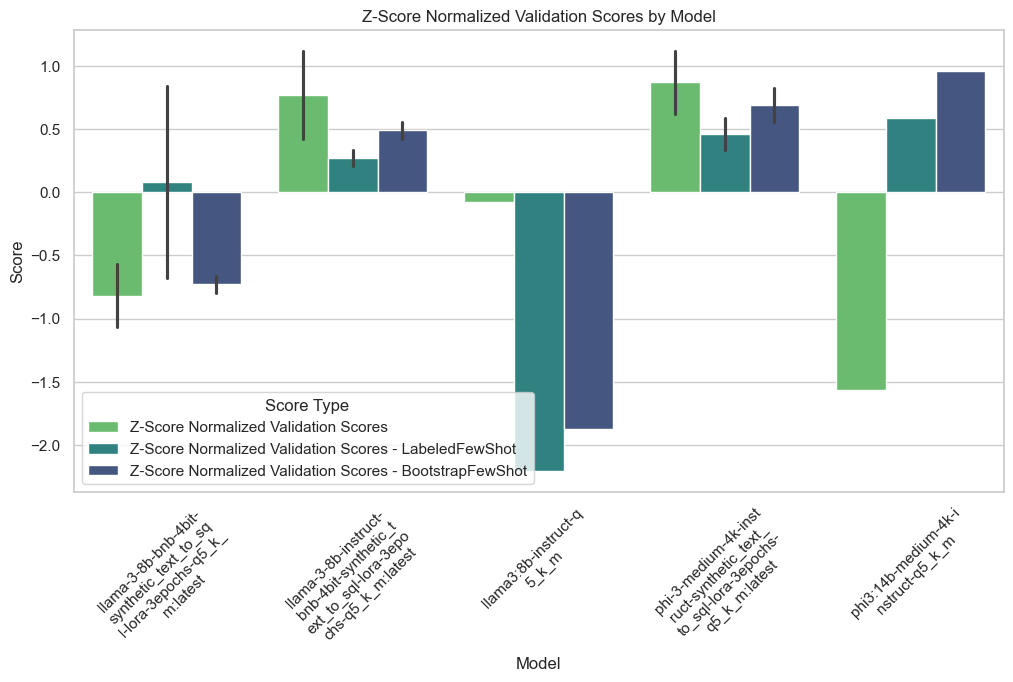

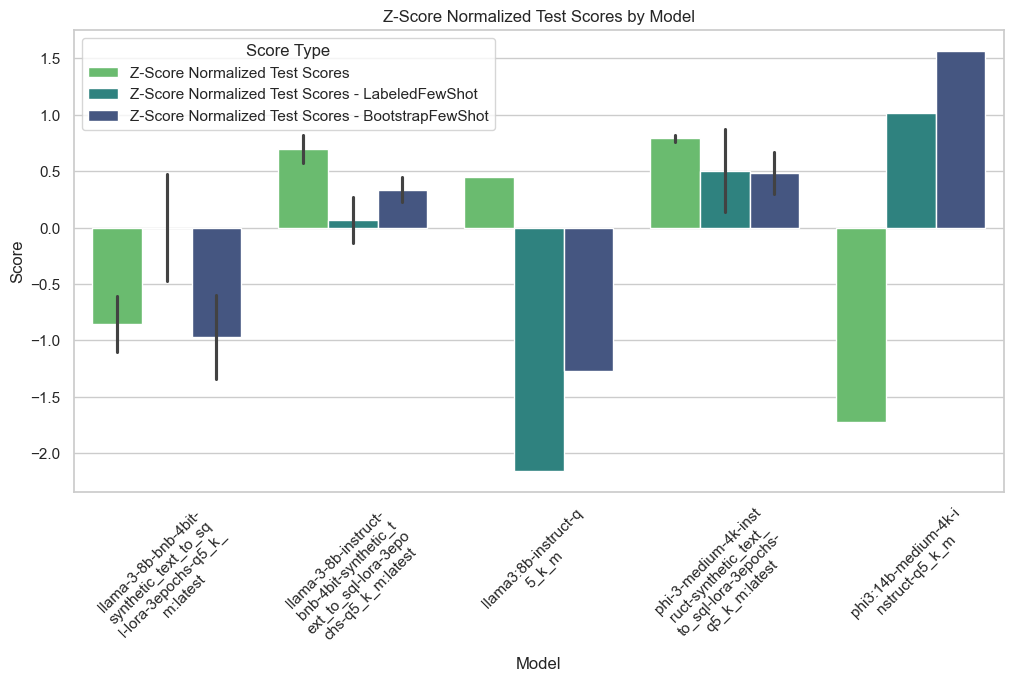

In [107]:
# Calculate the mean and standard deviation for each score type
mean_validation_scores = df[['Validation Scores', 'Validation Scores - LabeledFewShot', 'Validation Scores - BootstrapFewShot']].mean(axis=0)
std_validation_scores = df[['Validation Scores', 'Validation Scores - LabeledFewShot', 'Validation Scores - BootstrapFewShot']].std(axis=0)

mean_test_scores = df[['Test Scores', 'Test Scores - LabeledFewShot', 'Test Scores - BootstrapFewShot']].mean(axis=0)
std_test_scores = df[['Test Scores', 'Test Scores - LabeledFewShot', 'Test Scores - BootstrapFewShot']].std(axis=0)

# Normalize the scores using z-score
df['Z-Score Normalized Validation Scores'] = (df['Validation Scores'] - mean_validation_scores['Validation Scores']) / std_validation_scores['Validation Scores']
df['Z-Score Normalized Validation Scores - LabeledFewShot'] = (df['Validation Scores - LabeledFewShot'] - mean_validation_scores['Validation Scores - LabeledFewShot']) / std_validation_scores['Validation Scores - LabeledFewShot']
df['Z-Score Normalized Validation Scores - BootstrapFewShot'] = (df['Validation Scores - BootstrapFewShot'] - mean_validation_scores['Validation Scores - BootstrapFewShot']) / std_validation_scores['Validation Scores - BootstrapFewShot']

df['Z-Score Normalized Test Scores'] = (df['Test Scores'] - mean_test_scores['Test Scores']) / std_test_scores['Test Scores']
df['Z-Score Normalized Test Scores - LabeledFewShot'] = (df['Test Scores - LabeledFewShot'] - mean_test_scores['Test Scores - LabeledFewShot']) / std_test_scores['Test Scores - LabeledFewShot']
df['Z-Score Normalized Test Scores - BootstrapFewShot'] = (df['Test Scores - BootstrapFewShot'] - mean_test_scores['Test Scores - BootstrapFewShot']) / std_test_scores['Test Scores - BootstrapFewShot']

# Plot z-score normalized validation scores
plot_grouped_scores(df, ['Z-Score Normalized Validation Scores', 'Z-Score Normalized Validation Scores - LabeledFewShot', 'Z-Score Normalized Validation Scores - BootstrapFewShot'], 'Z-Score Normalized Validation Scores by Model')

# Plot z-score normalized test scores
plot_grouped_scores(df, ['Z-Score Normalized Test Scores', 'Z-Score Normalized Test Scores - LabeledFewShot', 'Z-Score Normalized Test Scores - BootstrapFewShot'], 'Z-Score Normalized Test Scores by Model')


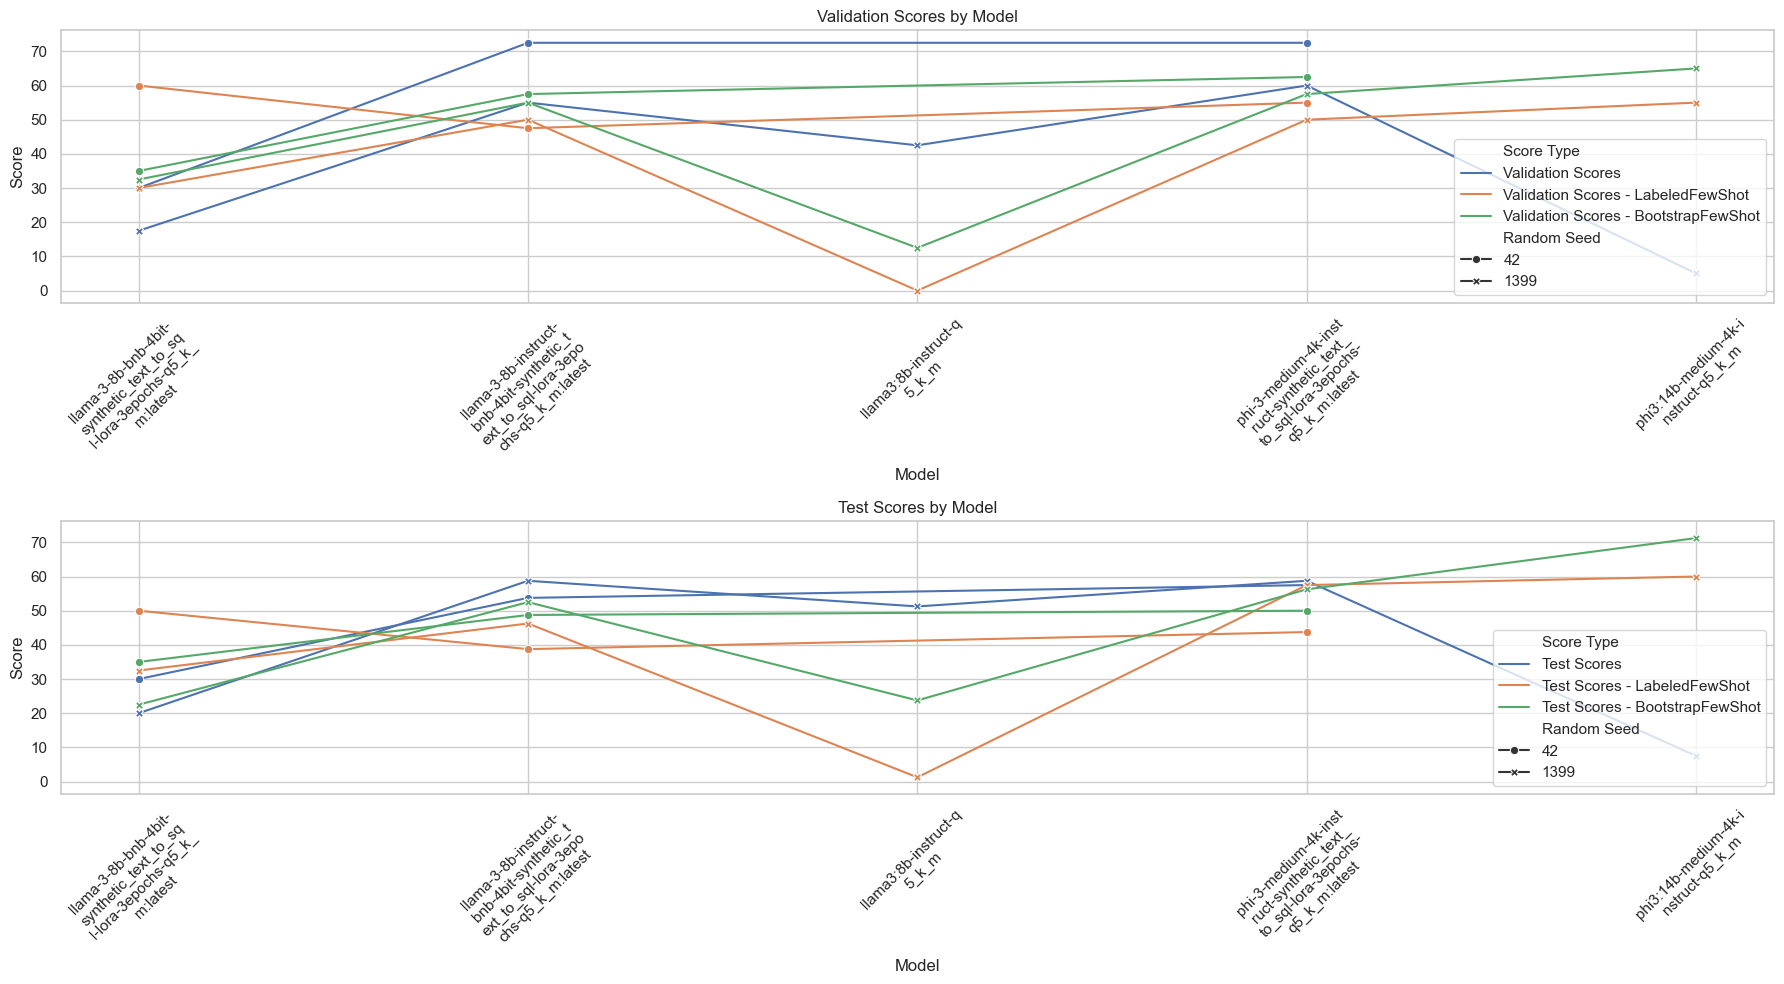

In [109]:
# Melt the DataFrame to long format for each type of test score
validation_scores_df = df.melt(id_vars=['Model', 'Random Seed'], 
                               value_vars=['Validation Scores', 'Validation Scores - LabeledFewShot', 'Validation Scores - BootstrapFewShot'], 
                               var_name='Score Type', 
                               value_name='Score')

test_scores_df = df.melt(id_vars=['Model', 'Random Seed'], 
                         value_vars=['Test Scores', 'Test Scores - LabeledFewShot', 'Test Scores - BootstrapFewShot'], 
                         var_name='Score Type', 
                         value_name='Score')

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(18, 10), sharey=True)

# Plot validation scores
sns.lineplot(data=validation_scores_df, x='Model', y='Score', hue='Score Type', style='Random Seed', markers=True, dashes=False, ax=axs[0])
axs[0].set_title('Validation Scores by Model')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Score')
axs[0].tick_params(axis='x', rotation=45)

# Plot test scores
sns.lineplot(data=test_scores_df, x='Model', y='Score', hue='Score Type', style='Random Seed', markers=True, dashes=False, ax=axs[1])
axs[1].set_title('Test Scores by Model')
axs[1].set_xlabel('Model')
axs[1].tick_params(axis='x', rotation=45)


# Adjust layout
plt.tight_layout()
plt.show()

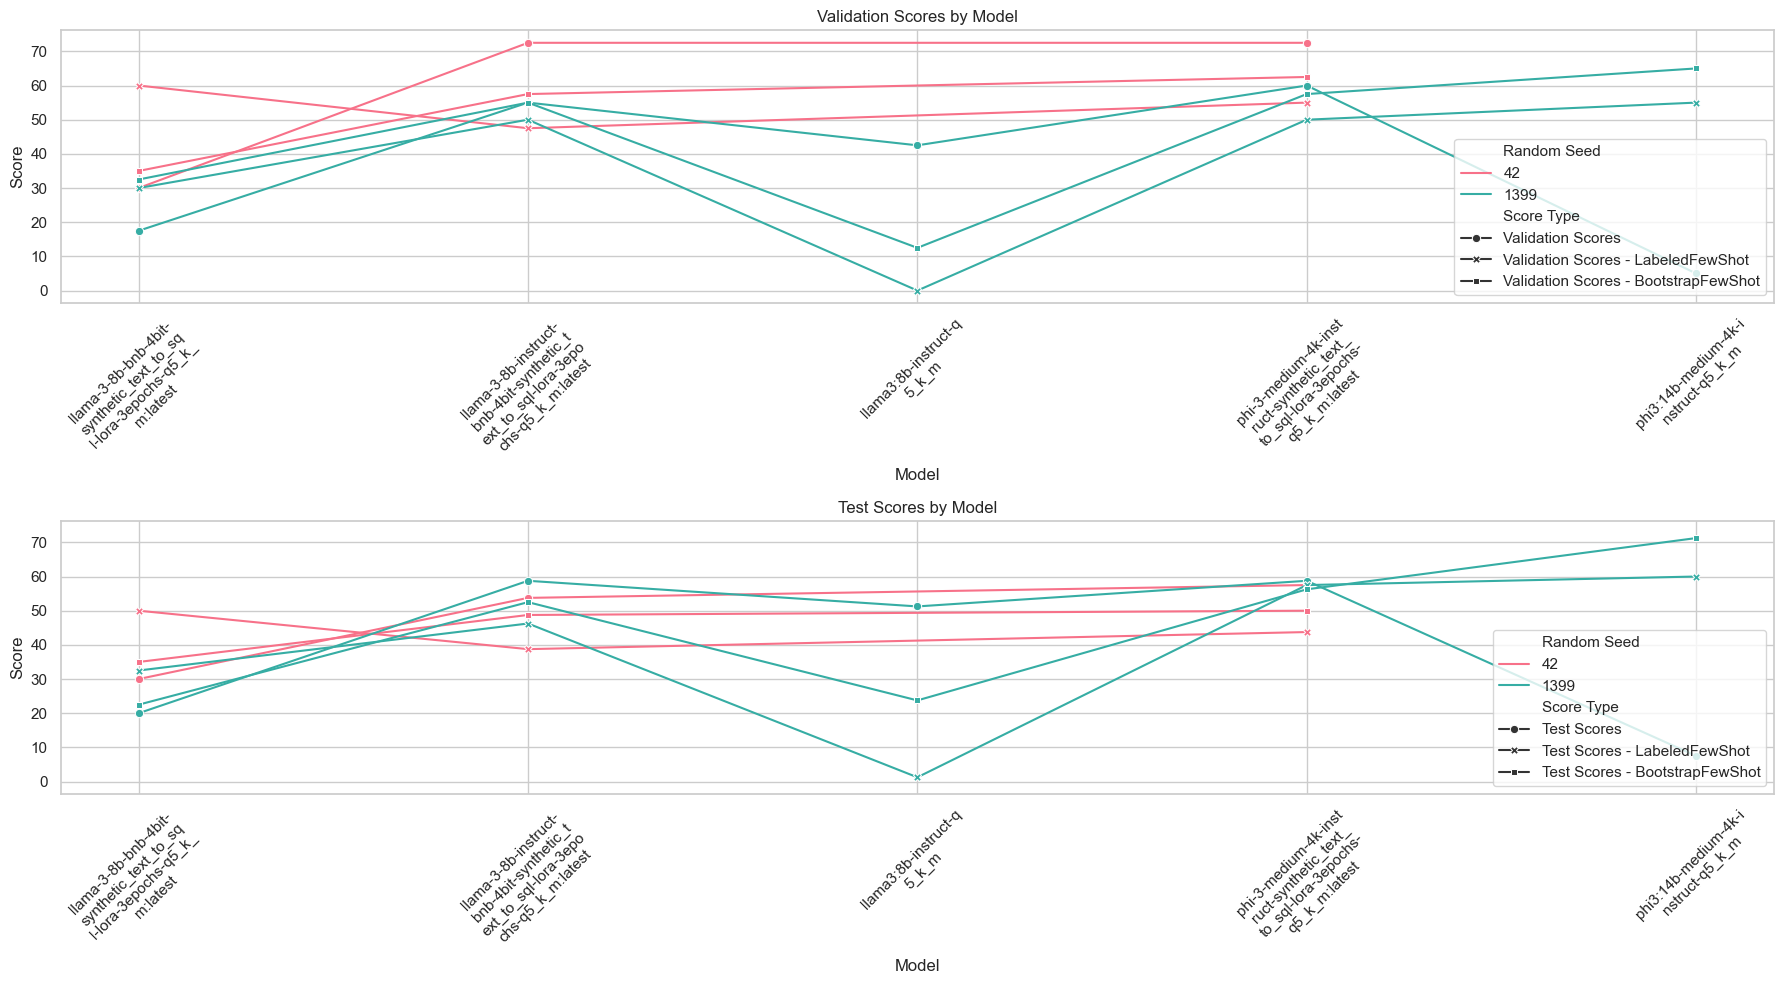

In [111]:
# Melt the DataFrame to long format for each type of test score
validation_scores_df = df.melt(id_vars=['Model', 'Random Seed'], 
                               value_vars=['Validation Scores', 'Validation Scores - LabeledFewShot', 'Validation Scores - BootstrapFewShot'], 
                               var_name='Score Type', 
                               value_name='Score')

test_scores_df = df.melt(id_vars=['Model', 'Random Seed'], 
                         value_vars=['Test Scores', 'Test Scores - LabeledFewShot', 'Test Scores - BootstrapFewShot'], 
                         var_name='Score Type', 
                         value_name='Score')

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(18, 10), sharey=True)

# Define a color palette
palette = sns.color_palette("husl", len(df['Random Seed'].unique()))

# Plot validation scores
sns.lineplot(data=validation_scores_df, x='Model', y='Score', hue='Random Seed', style='Score Type', markers=True, dashes=False, ax=axs[0], palette=palette)
axs[0].set_title('Validation Scores by Model')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Score')
axs[0].tick_params(axis='x', rotation=45)

# Plot test scores
sns.lineplot(data=test_scores_df, x='Model', y='Score', hue='Random Seed', style='Score Type', markers=True, dashes=False, ax=axs[1], palette=palette)
axs[1].set_title('Test Scores by Model')
axs[1].set_xlabel('Model')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

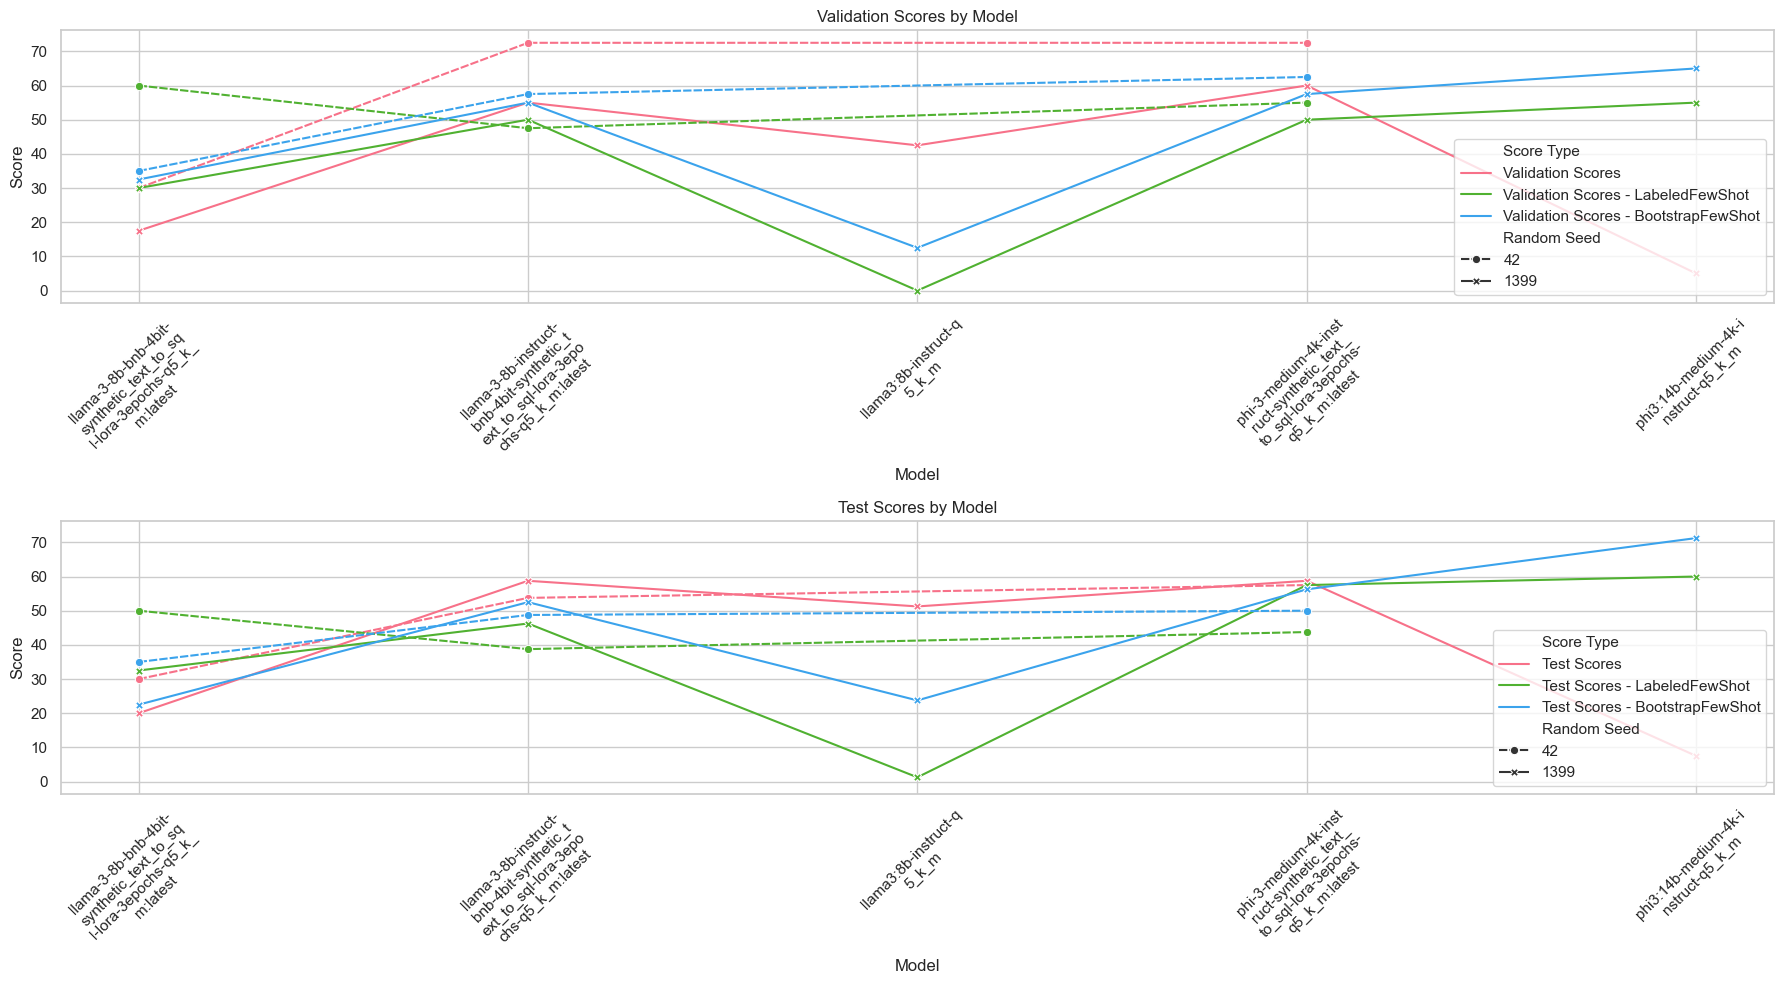

In [127]:
# Melt the DataFrame to long format for each type of test score
validation_scores_df = df.melt(id_vars=['Model', 'Random Seed'], 
                               value_vars=['Validation Scores', 'Validation Scores - LabeledFewShot', 'Validation Scores - BootstrapFewShot'], 
                               var_name='Score Type', 
                               value_name='Score')

test_scores_df = df.melt(id_vars=['Model', 'Random Seed'], 
                         value_vars=['Test Scores', 'Test Scores - LabeledFewShot', 'Test Scores - BootstrapFewShot'], 
                         var_name='Score Type', 
                         value_name='Score')

# Define a color palette
palette = sns.color_palette("husl", len(validation_scores_df['Score Type'].unique()))

# Define a dashes dictionary for the random seeds
unique_seeds = validation_scores_df['Random Seed'].unique()
dashes_dict = {seed: ((i+1)*2, 1*i) for i, seed in enumerate(unique_seeds)}

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(18, 10), sharey=True)

# Plot validation scores
sns.lineplot(data=validation_scores_df, x='Model', y='Score', hue='Score Type', style='Random Seed', markers=True, dashes=dashes_dict, palette=palette, ax=axs[0])
axs[0].set_title('Validation Scores by Model')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Score')
axs[0].tick_params(axis='x', rotation=45)

# Plot test scores
sns.lineplot(data=test_scores_df, x='Model', y='Score', hue='Score Type', style='Random Seed', markers=True, dashes=dashes_dict, palette=palette, ax=axs[1])
axs[1].set_title('Test Scores by Model')
axs[1].set_xlabel('Model')
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()